## Kaggle Competition - Spaceship Titanic

### Objetivo realizar a predição para o Spaceship Titanic


Bem-vindo ao ano de 2912, onde suas habilidades em ciência de dados são requeridas para desvendar um mistério cósmico. Uma transmissão proveniente de quatro anos-luz de distância chegou até nós, e os indícios não são nada promissores.

Há apenas um mês, a nave estelar Titanic partiu em sua viagem inaugural como um transatlântico interplanetário. Carregando cerca de 13.000 passageiros, sua missão era levar emigrantes do nosso sistema solar para três exoplanetas recentemente habitáveis que orbitavam estrelas próximas.

Enquanto passava por Alpha Centauri, a caminho do primeiro destino, o escaldante 55 Cancri E, a espaçonave Titanic se deparou com uma anomalia no espaço-tempo, oculta dentro de uma nebulosa de poeira. Infelizmente, enfrentou um destino semelhante ao de sua contraparte histórica, que ocorreu mil anos atrás. Embora a embarcação tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!

Sua missão é apoiar as equipes de resgate na recuperação dos passageiros desaparecidos. Para alcançar esse objetivo, você enfrenta o desafio de prever quais passageiros foram afetados pela anomalia, com base nos registros recuperados do sistema de computador danificado da espaçonave.

Sua contribuição é vital para resgatar esses passageiros e influenciar positivamente o curso da história.

### Importe de bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


import warnings
warnings.filterwarnings("ignore")


### Leitura dos dados

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


### Parte 1 - Processando os Dados

In [3]:
renomear = {'PassengerId':'IdPassageiro', 'HomePlanet':'Planeta_Casa', 'CryoSleep': 'Camara_Dormir', 
            'Cabin': 'Cabine', 'Destination': 'Destino', 'Age': 'Idade', 'VIP': 'VIP', 'RoomService': 'Servico_Quarto', 
            'FoodCourt':'Alimentacao', 'ShoppingMall':'Shopping', 'Spa': 'Spa', 'VRDeck': 'VRDeck', 'Name' :'Nome', 
            'Transported': 'Transportado'}
data = data.rename(columns = renomear)
data.head()

,IdPassageiro,Planeta_Casa,Camara_Dormir,Cabine,Destino,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Nome,Transportado
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data = data.drop(columns ='Nome',axis= 1)

In [5]:
data['Camara_Dormir'] = data['Camara_Dormir'].astype(bool)
data['VIP'] = data['VIP'].astype(bool)
data['Transportado'] = data['Transportado'].astype(bool)

In [6]:
data.dtypes

IdPassageiro       object
Planeta_Casa       object
Camara_Dormir        bool
Cabine             object
Destino            object
Idade             float64
VIP                  bool
Servico_Quarto    float64
Alimentacao       float64
Shopping          float64
Spa               float64
VRDeck            float64
Transportado         bool
dtype: object

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   IdPassageiro    8693 non-null   object 
 1   Planeta_Casa    8492 non-null   object 
 2   Camara_Dormir   8693 non-null   bool   
 3   Cabine          8494 non-null   object 
 4   Destino         8511 non-null   object 
 5   Idade           8514 non-null   float64
 6   VIP             8693 non-null   bool   
 7   Servico_Quarto  8512 non-null   float64
 8   Alimentacao     8510 non-null   float64
 9   Shopping        8485 non-null   float64
 10  Spa             8510 non-null   float64
 11  VRDeck          8505 non-null   float64
 12  Transportado    8693 non-null   bool   
dtypes: bool(3), float64(6), object(4)
memory usage: 704.7+ KB


In [8]:
data.isna().sum()

IdPassageiro        0
Planeta_Casa      201
Camara_Dormir       0
Cabine            199
Destino           182
Idade             179
VIP                 0
Servico_Quarto    181
Alimentacao       183
Shopping          208
Spa               183
VRDeck            188
Transportado        0
dtype: int64

In [9]:
data.duplicated().sum()

0

In [10]:
# verificando valore únicos 
print(data['Planeta_Casa'].unique())
print(data['Destino'].unique())

['Europa' 'Earth' 'Mars' nan]
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


### Tratando Valores Ausentes

In [11]:
moda_planeta_casa = data['Planeta_Casa'].mode()[0]
moda_destino = data['Destino'].mode()[0]
media_idade = data['Idade'].mean()
mediana_idade = data['Idade'].mean()
mediana_Servico_Quarto = data['Servico_Quarto'].median()
mediana_Alimentacao = data['Alimentacao'].median()
mediana_Shopping = data['Shopping'].median()
mediana_Spa = data['Spa'].median()
mediana_VRDeck = data['VRDeck'].median()
data['Planeta_Casa'].fillna(moda_planeta_casa, inplace=True)
data['Destino'].fillna(moda_planeta_casa, inplace=True)
data['Idade'].fillna(media_idade, inplace=True)
data['Servico_Quarto'].fillna(mediana_Servico_Quarto, inplace=True)
data['Alimentacao'].fillna(mediana_Alimentacao, inplace=True)
data['Shopping'].fillna(mediana_Shopping, inplace=True)
data['Spa'].fillna(mediana_Spa, inplace=True)
data['VRDeck'].fillna(mediana_VRDeck, inplace=True)

In [12]:
data['Destino'].isna().sum()

0

In [13]:
# Verificando fetures categóticas
data.select_dtypes(include='object').nunique()

IdPassageiro    8693
Planeta_Casa       3
Cabine          6560
Destino            4
dtype: int64

In [14]:
data = data.drop(columns =['IdPassageiro','Cabine'], axis=1)

In [15]:
data.head(3)

,Planeta_Casa,Camara_Dormir,Destino,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Transportado
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False


#### Conclusão Intermediária

Durante esta fase inicial de pré-processamento dos dados, executei várias ações importantes. Inicialmente, revisei os tipos de dados presentes no conjunto de dados, tratei valores ausentes e eliminei possíveis duplicações. Além disso, renomeei variáveis para tornar sua identificação mais clara e removi características que não desempenharão um papel significativo na modelagem dos dados. Essas ações cumulativas nos permitiram preparar os dados de maneira mais apropriada, o que, por sua vez, facilitará uma análise mais precisa e aprofundada.

### Análise Exploratória dos Dados

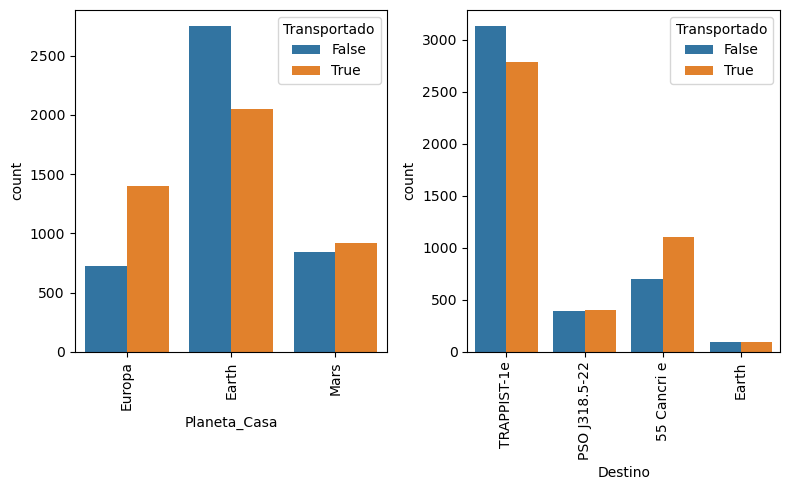

In [16]:
var_cat = ['Planeta_Casa','Destino']

# gerando a figura do gráfico
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
axs = axs.flatten()

# gerando grafico de barras
for i, var in enumerate(var_cat):
    sns.countplot(x=var, hue='Transportado', data=data, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)
    
# ajuste dos espaços entre os graficos
fig.tight_layout()
plt.show()

O gráfico acima evidencia que o maior volume de passageiros transportados origina-se da Terra e tem TRAPPIST-1e como destino. Para obter insights mais detalhados, iremos segmentar esse grupo e realizar uma análise mais aprofundada dos dados.

In [17]:
# Filtrar e agrupar os dados por 'Planeta_Casa' e 'Destino'
grouped_data = data[data['Destino'] == 'TRAPPIST-1e'].groupby('Planeta_Casa').mean()

# Exibir os dados agrupados
grouped_data

,Camara_Dormir,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Transportado
Planeta_Casa,,,,,,,,,
Earth,0.290065,26.622924,0.022762,148.786220,148.488773,139.823439,156.661950,151.478622,0.392802
Europa,0.402019,34.309829,0.068966,147.058032,1360.264087,168.376787,820.910008,833.390244,0.634987
Mars,0.404068,29.228109,0.062373,545.945763,52.094237,290.438644,107.718644,43.897627,0.511864


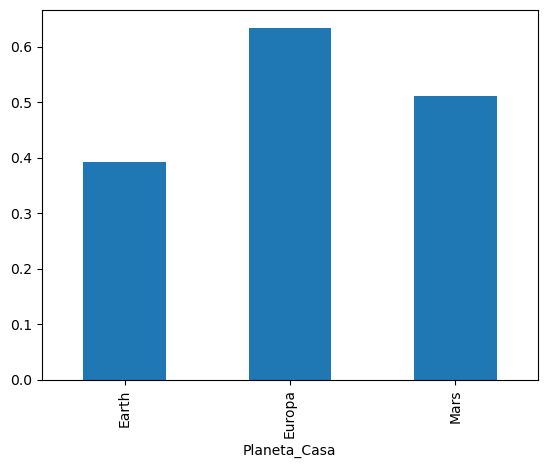

In [18]:
grouped_data['Transportado'].plot(kind='bar');

Ao examinarmos os dados com foco no destino 'TRAPPIST-1e', observamos que a região com o maior média de passageiros transportados também apresenta um volume significativo de indivíduos provenientes dos planetas Europa e Marte. Isso sugere uma correlação entre a origem desses passageiros e o destino selecionado, destacando a influência desses dois planetas na demanda de viagens para TRAPPIST-1e.

In [19]:
# Criar a tabela dinâmica
pivot_table = pd.pivot_table(data, index=['Planeta_Casa'], values=['Camara_Dormir', 'VIP', 'Servico_Quarto', 'Alimentacao', 'Shopping', 'Spa', 'VRDeck', 'Transportado'], aggfunc='mean')
pivot_table.corr()

,Alimentacao,Camara_Dormir,Servico_Quarto,Shopping,Spa,Transportado,VIP,VRDeck
Alimentacao,1.000000,0.763937,-0.534976,-0.471115,0.999941,0.888224,0.752008,0.998644
Camara_Dormir,0.763937,1.000000,0.136498,0.209291,0.770886,0.975000,0.999833,0.729313
Servico_Quarto,-0.534976,0.136498,1.000000,0.997269,-0.525787,-0.087037,0.154591,-0.578227
Shopping,-0.471115,0.209291,0.997269,1.000000,-0.461527,-0.013223,0.227138,-0.516390
Spa,0.999941,0.770886,-0.525787,-0.461527,1.000000,0.893151,0.759109,0.998022
Transportado,0.888224,0.975000,-0.087037,-0.013223,0.893151,1.000000,0.970774,0.863107
VIP,0.752008,0.999833,0.154591,0.227138,0.759109,0.970774,1.000000,0.716679
VRDeck,0.998644,0.729313,-0.578227,-0.516390,0.998022,0.863107,0.716679,1.000000


Até o momento não temos um padrão de alguma feature mais associativa em relação aos transportados, por exemplo, no caso de pessoas vips terem "alguma vantagem", e/ou "SPA" e demais tipos de consumo que possam associar a um padrão.

### Pré- Processamento Dados

In [20]:
encoder = OrdinalEncoder()
data = pd.DataFrame(encoder.fit_transform(data), columns=data.columns)
data.head()


,Planeta_Casa,Camara_Dormir,Destino,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Transportado
0,1.0,0.0,3.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.0,24.0,0.0,109.0,9.0,25.0,456.0,44.0,1.0
2,1.0,0.0,3.0,59.0,1.0,43.0,1206.0,0.0,1273.0,49.0,0.0
3,1.0,0.0,3.0,34.0,0.0,0.0,806.0,332.0,1132.0,187.0,0.0
4,0.0,0.0,3.0,16.0,0.0,277.0,69.0,149.0,470.0,2.0,1.0


In [21]:
data['Camara_Dormir'] = data['Camara_Dormir'].astype(int)
data['VIP'] = data['VIP'].astype(int)
data['Transportado'] = data['Transportado'].astype(int)
data.head()

,Planeta_Casa,Camara_Dormir,Destino,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Transportado
0,1.0,0,3.0,40.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,3.0,24.0,0,109.0,9.0,25.0,456.0,44.0,1
2,1.0,0,3.0,59.0,1,43.0,1206.0,0.0,1273.0,49.0,0
3,1.0,0,3.0,34.0,0,0.0,806.0,332.0,1132.0,187.0,0
4,0.0,0,3.0,16.0,0,277.0,69.0,149.0,470.0,2.0,1


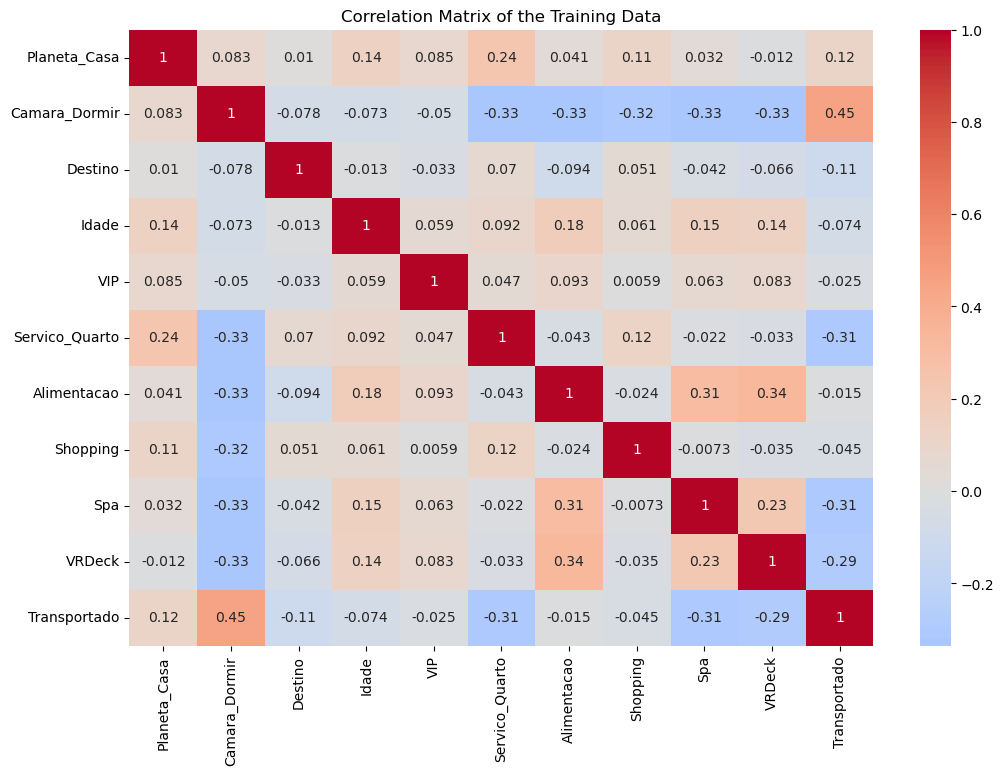

In [22]:
# Correlation matrix
corr = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of the Training Data')
plt.show()

Analisando o mapa de correlação, identificamos uma relação significativa entre os passageiros transportados e as variáveis de "planeta_casa" e "camara para dormir".

### Separando dados para treinamento 

In [23]:
X = data.drop('Transportado',axis = 1)
y = data.Transportado

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 50, test_size=0.30)

In [24]:
# normalizando as features
norm = StandardScaler()
X_train = norm.fit_transform(X_train)
X_train

array([[-0.81954067, -0.77029153,  0.62416145, ..., -0.43614003,
        -0.45297755, -0.45507056],
       [-0.81954067, -0.77029153,  0.62416145, ...,  3.68971379,
        -0.45297755, -0.45507056],
       [-0.81954067,  1.29820978, -1.84155316, ..., -0.43614003,
        -0.45297755, -0.45507056],
       ...,
       [-0.81954067, -0.77029153, -0.19774342, ..., -0.43614003,
        -0.45297755, -0.45507056],
       [-0.81954067, -0.77029153, -0.19774342, ...,  0.6180611 ,
        -0.45297755,  0.26212461],
       [ 0.43471108, -0.77029153,  0.62416145, ..., -0.41960354,
        -0.42916285,  0.78967683]])

In [25]:
# verificando o balanceamento da classe
y_train.value_counts()

0    3056
1    3029
Name: Transportado, dtype: int64

Durante esta etapa, executamos três processos cruciais. Primeiro, dividimos os dados em conjuntos de treinamento e validação, preparando-os para o treinamento dos modelos. Em seguida, normalizamos as escalas das características, otimizando a precisão dos estimadores. Por fim, equilibramos as classes do nosso alvo, criando um ambiente mais equitativo e eficaz para a análise.

### Treinando Modelo

#### KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_val)

print('Verificando a acurácia KNN:  ')
accuracy_score(y_val,knn_pred)

Verificando a acurácia KNN:  


0.6039110429447853

#### BernoulliNB

In [27]:
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_val)

print('Verificando a acurácia BernoulliNB :  ')
accuracy_score(y_val,bnb_pred)

Verificando a acurácia BernoulliNB :  


0.7273773006134969

#### DecisionTreeClassifier

In [28]:
dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

print('Verificando a acurácia DecisionTreeClassifier :  ')
accuracy_score(y_val,dt_pred)

Verificando a acurácia DecisionTreeClassifier :  


0.3811349693251534

#### SVC

In [29]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_val)

print('Verificando a acurácia DecisionTreeClassifier :  ')
accuracy_score(y_val,svc_pred)

Verificando a acurácia DecisionTreeClassifier :  


0.48773006134969327

#### RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

print('Verificando a acurácia DecisionTreeClassifier :  ')
accuracy_score(y_val,rfc_pred)

Verificando a acurácia DecisionTreeClassifier :  


0.48964723926380366

### Parte 2 - Analise Exploratória de Dados

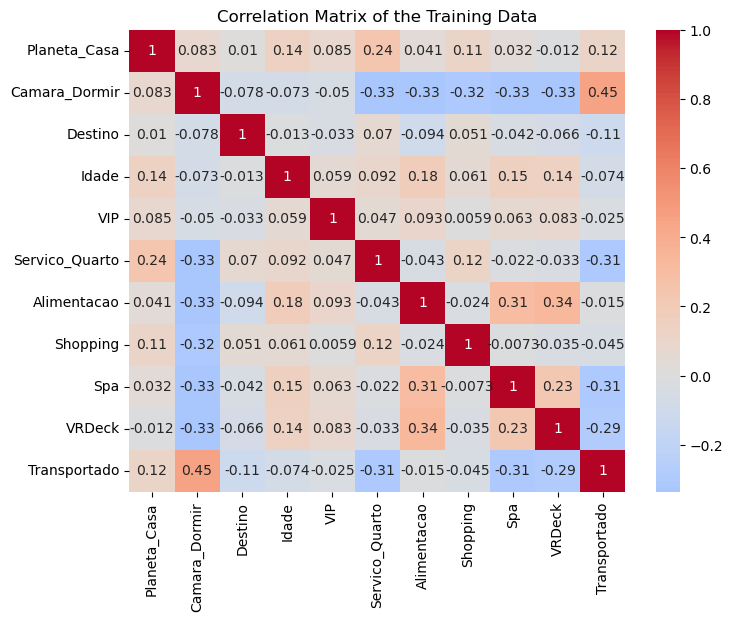

In [31]:
# Correlation matrix
corr = data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of the Training Data')
plt.show()

In [32]:
data.head(2)

,Planeta_Casa,Camara_Dormir,Destino,Idade,VIP,Servico_Quarto,Alimentacao,Shopping,Spa,VRDeck,Transportado
0,1.0,0,3.0,40.0,0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0,3.0,24.0,0,109.0,9.0,25.0,456.0,44.0,1


In [33]:
data_02 = data.drop(columns = ['VRDeck','Spa','Servico_Quarto','Destino','Transportado'])
data_02.head(2)

,Planeta_Casa,Camara_Dormir,Idade,VIP,Alimentacao,Shopping
0,1.0,0,40.0,0,0.0,0.0
1,0.0,0,24.0,0,9.0,25.0


In [34]:
## Separando os dados de treinamento e validação sem feature de menores relatividade com transportado

X = data_02
y = data.Transportado

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 50, test_size=0.30)                                    


### Parte 2 Treinando Modelos

In [35]:
#KNN
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_val)

print('Verificando a acurácia KNN:  ')
accuracy_score(y_val,knn_pred)

Verificando a acurácia KNN:  


0.7239263803680982

In [36]:
#bnb
bnb = BernoulliNB()
bnb.fit(X_train, y_train)
bnb_pred = bnb.predict(X_val)

print('Verificando a acurácia BernoulliNB :  ')
accuracy_score(y_val,bnb_pred)

Verificando a acurácia BernoulliNB :  


0.718941717791411

In [37]:
#dt
dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_val)

print('Verificando a acurácia DecisionTreeClassifier :  ')
accuracy_score(y_val,dt_pred)

Verificando a acurácia DecisionTreeClassifier :  


0.714340490797546

In [38]:
#svc
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_val)

print('Verificando a acurácia SVM :  ')
accuracy_score(y_val,svc_pred)

Verificando a acurácia SVM :  


0.629217791411043

In [39]:
#rfc
rfc = RandomForestClassifier(random_state=50)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

print('Verificando a acurácia RandomForestClassifier :  ')
accuracy_score(y_val,rfc_pred)

Verificando a acurácia RandomForestClassifier :  


0.7331288343558282

#### Conclusão Intermediária
Após a conclusão deste teste, fica evidente que a validação apresentou um desempenho superior. Isso foi possível ao remover as características que mostraram correlações negativas com o alvo. Além disso, identificamos que o modelo mais eficaz foi o RandomForestClassifier. Na próxima fase, vamos aprofundar nossa análise ao explorar e ajustar os hiperparâmetros para alcançar um nível ainda mais otimizado de desempenho do modelo.

### Ajustando Parametros

In [40]:
# Random Florest
n_estimator_list = [5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610]

def n_estimator(X_train,X_val, y_train, y_val):
    results = {}
    for n_estimator in n_estimator_list:
        rfc = RandomForestClassifier(random_state=50, n_estimators=n_estimator)
        rfc.fit(X_train, y_train)
        rfc_pred = rfc.predict(X_val)
        acuracia  = accuracy_score(y_val,rfc_pred)
        results[n_estimator] = acuracia
    return results

In [41]:
n_estimator(X_train,X_val, y_train, y_val)

{5: 0.7285276073619632,
 8: 0.7296779141104295,
 13: 0.7323619631901841,
 21: 0.7335122699386503,
 34: 0.7346625766871165,
 55: 0.7335122699386503,
 89: 0.7358128834355828,
 144: 0.7315950920245399,
 233: 0.7315950920245399,
 377: 0.7289110429447853,
 610: 0.7300613496932515}

### Best Model

In [42]:
#rfc
rfc = RandomForestClassifier(random_state=50 , n_estimators = 89)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_val)

print('Verificando a acurácia RandomForestClassifier :  ')
accuracy_score(y_val,rfc_pred)

Verificando a acurácia RandomForestClassifier :  


0.7358128834355828

### Conclusão Geral

Após a conclusão de todas as etapas utilizando o modelo mais eficaz, o RandomForestClassifier, alcançamos uma acurácia de 73%. Durante a otimização do modelo, observamos uma ligeira melhoria ao remover as características de menor relevância.

No contexto da análise exploratória, não foram identificados padrões evidentes com associações diretas. No entanto, a exploração do mapa de correlação proporcionou algumas perspectivas interessantes. Ao incluir todas as características, inclusive as de menor correlação, experimentamos uma melhoria no desempenho geral do modelo. Isso demonstra a importância de considerar diferentes ângulos e abordagens ao desenvolver e aprimorar nossos modelos preditivos.